<a href="https://colab.research.google.com/github/donigagahhh/BIGDATA/blob/master/1800018196.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERHITUNGAN JUMLAH 10 APLIKASI TERATAS YANG PALING BANYAK DI INSTALL BERDASARKAN GENRE ATAU KATEGORI**


NAMA : DONI GAGAH PRAMUDYA
NIM : 1800018196

INSTALL SPARK PADA GOOGLE COLAB

In [1]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://downloads.apache.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
! tar xf spark-2.4.6-bin-hadoop2.7.tgz
! pip install -q findspark
! pip install pyspark_dist_explore

Import library Spark yang sudah diinstal

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import package yang akan digunakan

In [3]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
from matplotlib import pyplot as plt
from pyspark_dist_explore import Histogram, hist

Inisialisasi SparkContext dan SparkSession

In [4]:
sc = spark.sparkContext
spark = SparkSession(sc)

LOAD DATASET

In [5]:
datagoogleplaystore = spark.read.csv('googleplaystore.csv', header=True, inferSchema=True)
datagoogleplaystore.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



PROSES EDA

total aplikasi

In [6]:
print("Total Aplikasi : ", datagoogleplaystore.count())

Total Aplikasi :  10841


10 data teratas

In [7]:
datagoogleplaystore.show(10)

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|      Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|   January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|  January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    August 1, 2018|             1.2.4|4.0.3 

**Statistik dataset**

In [8]:
datagoogleplaystore.describe().show()

+-------+--------------------+-------------+-----------+-----------------+------------------+------------------+-----+------------------+--------------+------+-----------------+-------------+------------------+
|summary|                 App|     Category|     Rating|          Reviews|              Size|          Installs| Type|             Price|Content Rating|Genres|     Last Updated|  Current Ver|       Android Ver|
+-------+--------------------+-------------+-----------+-----------------+------------------+------------------+-----+------------------+--------------+------+-----------------+-------------+------------------+
|  count|               10841|        10841|      10841|            10841|             10841|             10841|10841|             10841|         10840| 10841|            10841|        10840|             10840|
|   mean|                null|          1.9|        NaN|444225.1924709356|              null| 2.866666666666667|  NaN|               0.0|          null|  nu

persebaran data pada kolom

In [9]:
from pyspark.sql.types import StructField, IntegerType, StructType, StringType

newGPS = [
    StructField("Genres", IntegerType(), True),
]

finalStruct = StructType(fields=newGPS)

datagoogleplaystore = spark.read.csv('googleplaystore.csv', header=True, inferSchema=True)
datagoogleplaystore.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



**MENGECEK APAKAH ADA DATA YANG NULL**

In [10]:
table = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

for kolom in table:
  print('jumlah data yang bernilai null pada colom ', kolom, ' : ', datagoogleplaystore.where(col(kolom).isNull()).count())

jumlah data yang bernilai null pada colom  App  :  0
jumlah data yang bernilai null pada colom  Category  :  0
jumlah data yang bernilai null pada colom  Rating  :  0
jumlah data yang bernilai null pada colom  Reviews  :  0
jumlah data yang bernilai null pada colom  Size  :  0
jumlah data yang bernilai null pada colom  Installs  :  0
jumlah data yang bernilai null pada colom  Type  :  0
jumlah data yang bernilai null pada colom  Price  :  0
jumlah data yang bernilai null pada colom  Content Rating  :  1
jumlah data yang bernilai null pada colom  Genres  :  0
jumlah data yang bernilai null pada colom  Last Updated  :  0
jumlah data yang bernilai null pada colom  Current Ver  :  1
jumlah data yang bernilai null pada colom  Android Ver  :  1


**Pre Processing**

In [11]:
dataPP = datagoogleplaystore.select('App', 'Genres', 'Category')
dataPP.show(10)

+--------------------+--------------------+--------------+
|                 App|              Genres|      Category|
+--------------------+--------------------+--------------+
|Photo Editor & Ca...|        Art & Design|ART_AND_DESIGN|
| Coloring book moana|Art & Design;Pret...|ART_AND_DESIGN|
|U Launcher Lite –...|        Art & Design|ART_AND_DESIGN|
|Sketch - Draw & P...|        Art & Design|ART_AND_DESIGN|
|Pixel Draw - Numb...|Art & Design;Crea...|ART_AND_DESIGN|
|Paper flowers ins...|        Art & Design|ART_AND_DESIGN|
|Smoke Effect Phot...|        Art & Design|ART_AND_DESIGN|
|    Infinite Painter|        Art & Design|ART_AND_DESIGN|
|Garden Coloring Book|        Art & Design|ART_AND_DESIGN|
|Kids Paint Free -...|Art & Design;Crea...|ART_AND_DESIGN|
+--------------------+--------------------+--------------+
only showing top 10 rows



In [12]:
datagoogleplaystore.groupby("Genres", "Category").count().sort(col("count").desc()).show(10, False)

+---------------+---------------+-----+
|Genres         |Category       |count|
+---------------+---------------+-----+
|Tools          |TOOLS          |842  |
|Entertainment  |FAMILY         |487  |
|Medical        |MEDICAL        |463  |
|Business       |BUSINESS       |460  |
|Productivity   |PRODUCTIVITY   |424  |
|Education      |FAMILY         |420  |
|Personalization|PERSONALIZATION|392  |
|Communication  |COMMUNICATION  |387  |
|Sports         |SPORTS         |384  |
|Lifestyle      |LIFESTYLE      |381  |
+---------------+---------------+-----+
only showing top 10 rows



**Pemrosesan Data**

In [13]:
data_chart = datagoogleplaystore.select('App', 'Rating', 'Category', 'Genres')
art_design = data_chart.filter(data_chart.Genres == 'Art & Design')
art_design = art_design.filter(data_chart.Rating <= 5.0)
art_design = art_design.orderBy('Rating', ascending=False)

**Visualisasi Data**

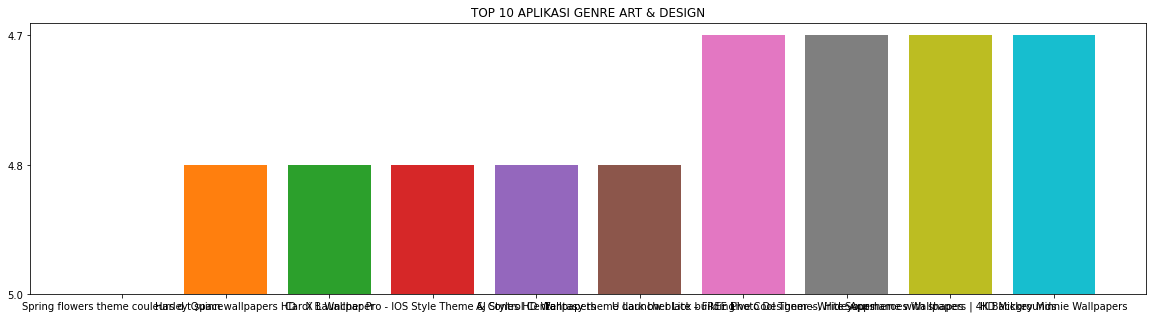

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

plt.title('TOP 10 APLIKASI GENRE ART & DESIGN')

for i in range(10):
  plt.bar(art_design.collect()[i][0], art_design.collect()[i][1])
